In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:

# Directory containing the CSV file
directory = 'path_to_your_csv_files'
file_name = 'rain_data.csv'  # Change this to your actual file name
file_path = os.path.join(directory, file_name)
# Read the CSV file
df = pd.read_csv("/home/udit/Documents/Github/ISSA/data/refine_data/fid_0_data_1901_1999.csv", header=None)


In [6]:


# Extract years and rainfall data
years = df.iloc[0].astype(int)
rainfall = df.iloc[1].astype(float)

# Create a DataFrame
data = pd.DataFrame({'Year': years, 'Rainfall': rainfall})


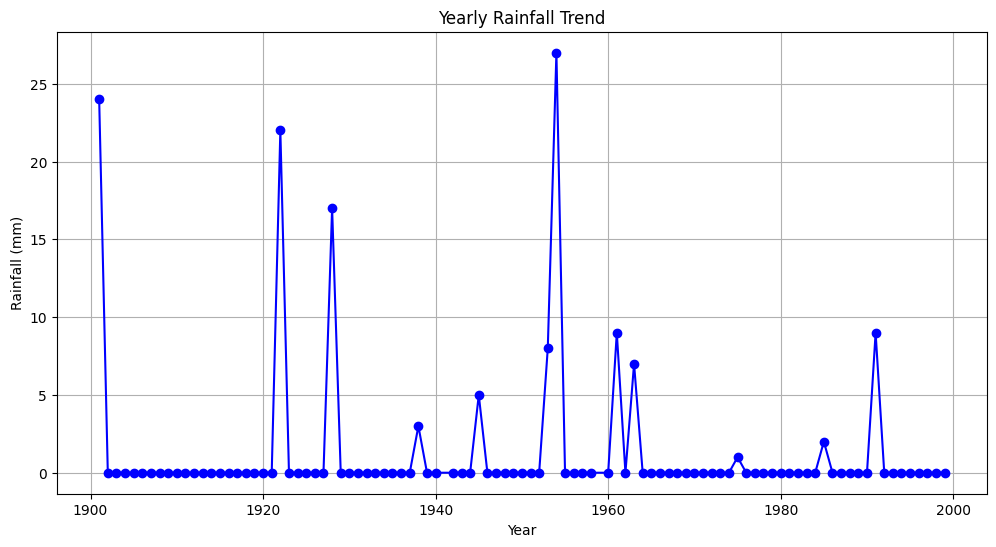

In [7]:

# Line Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Rainfall'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Trend')
plt.grid()
plt.show()


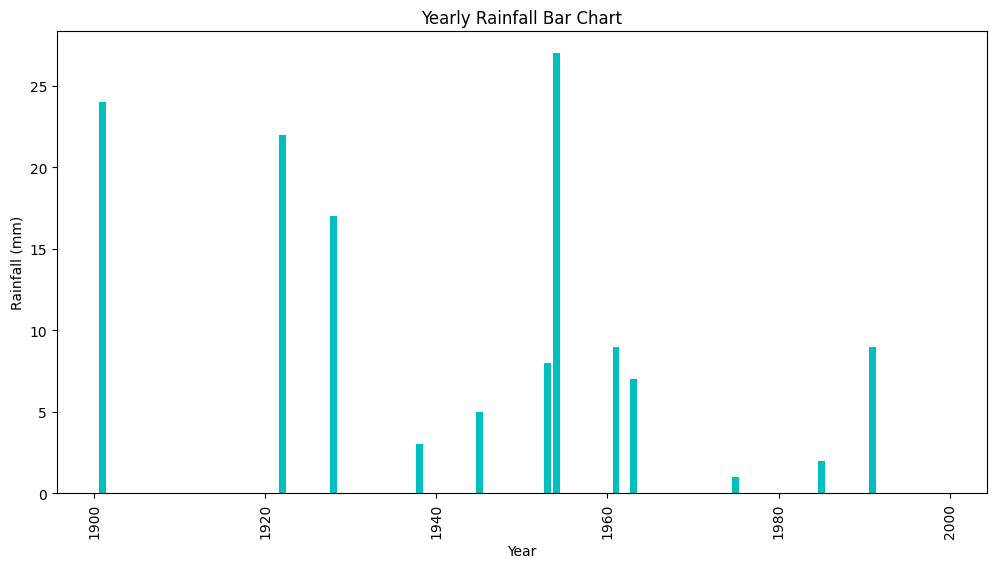

In [6]:

# Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(data['Year'], data['Rainfall'], color='c')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Yearly Rainfall Bar Chart')
plt.xticks(rotation=90)
plt.show()


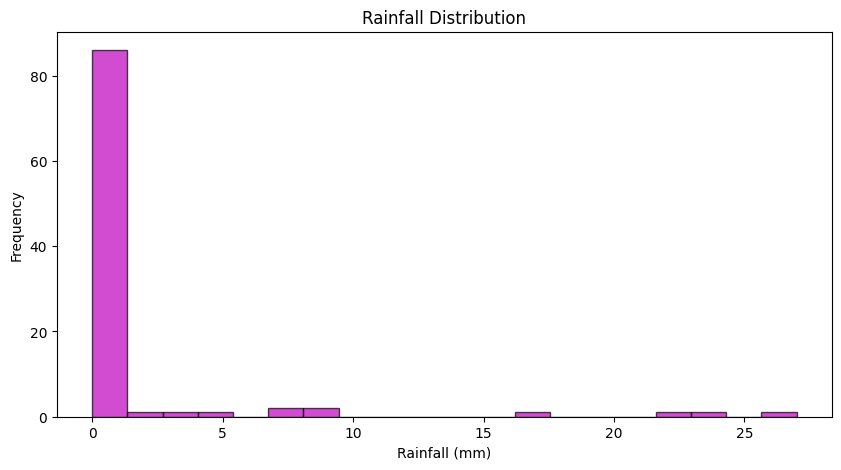

In [7]:

# Histogram
plt.figure(figsize=(10, 5))
plt.hist(data['Rainfall'], bins=20, color='m', edgecolor='k', alpha=0.7)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Rainfall Distribution')
plt.show()


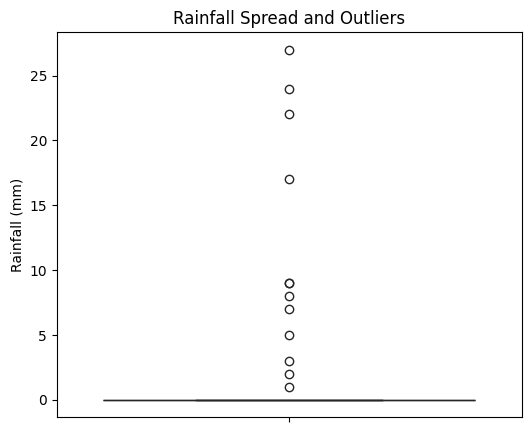

In [8]:

# Box Plot
plt.figure(figsize=(6, 5))
sns.boxplot(y=data['Rainfall'], color='g')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Spread and Outliers')
plt.show()


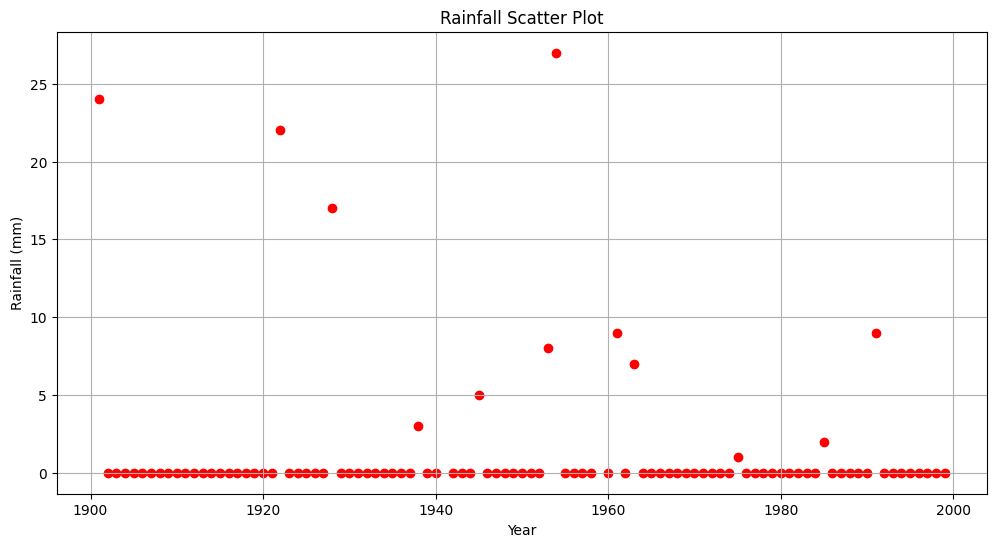

In [9]:

# Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(data['Year'], data['Rainfall'], color='r')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Scatter Plot')
plt.grid()
plt.show()


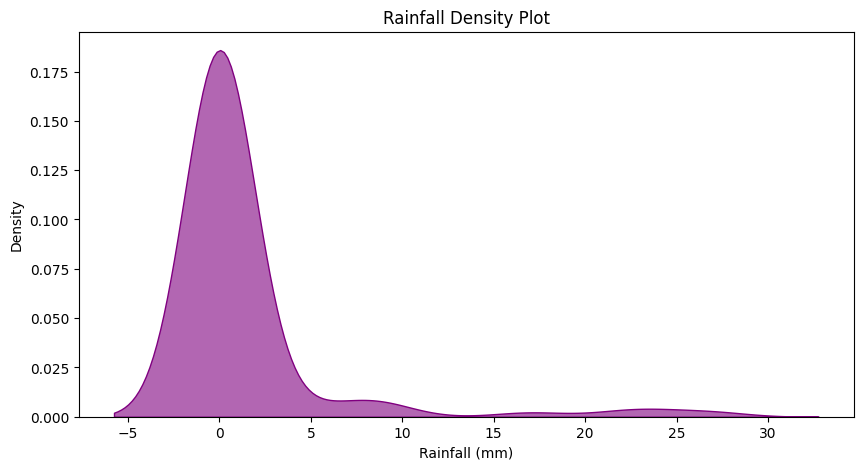

All plots generated successfully!


In [10]:

# Density Plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data['Rainfall'], fill=True, color='purple', alpha=0.6)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Density')
plt.title('Rainfall Density Plot')
plt.show()

print("All plots generated successfully!")


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# =============================================================================
# 1. LOAD & RESHAPE THE DATA
# =============================================================================
# Assume your CSV has a first column "Days" (1 to 365) and then columns "1901", "1902", ... "1999"

# Read the data (wide format)
df_wide = pd.read_csv("/home/udit/Documents/Github/ISSA/data/refine_data/f_.csv")


In [12]:

# Convert the data to long format:
# - id_vars: the Days column (each row represents a day-of-year)
# - var_name: 'Year' (each column header becomes a value in the Year column)
# - value_name: 'Value' (the measurement)
df_long = df_wide.melt(id_vars="Days", var_name="Year", value_name="Value")


In [13]:

# Convert data types
df_long['Year'] = df_long['Year'].astype(int)
df_long['Days'] = df_long['Days'].astype(int)

# Create a proper Date column by combining Year and Day-of-Year.
# (Note: since each year has exactly 365 days, we treat 'Days' as day-of-year.)
df_long['Date'] = pd.to_datetime(df_long['Year'], format='%Y') + pd.to_timedelta(df_long['Days'] - 1, unit='D')
df_long.sort_values('Date', inplace=True)
df_long.set_index('Date', inplace=True)



Overall Descriptive Statistics:
count    35526.000000
mean         3.943816
std         12.999347
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        306.000000
Name: Value, dtype: float64


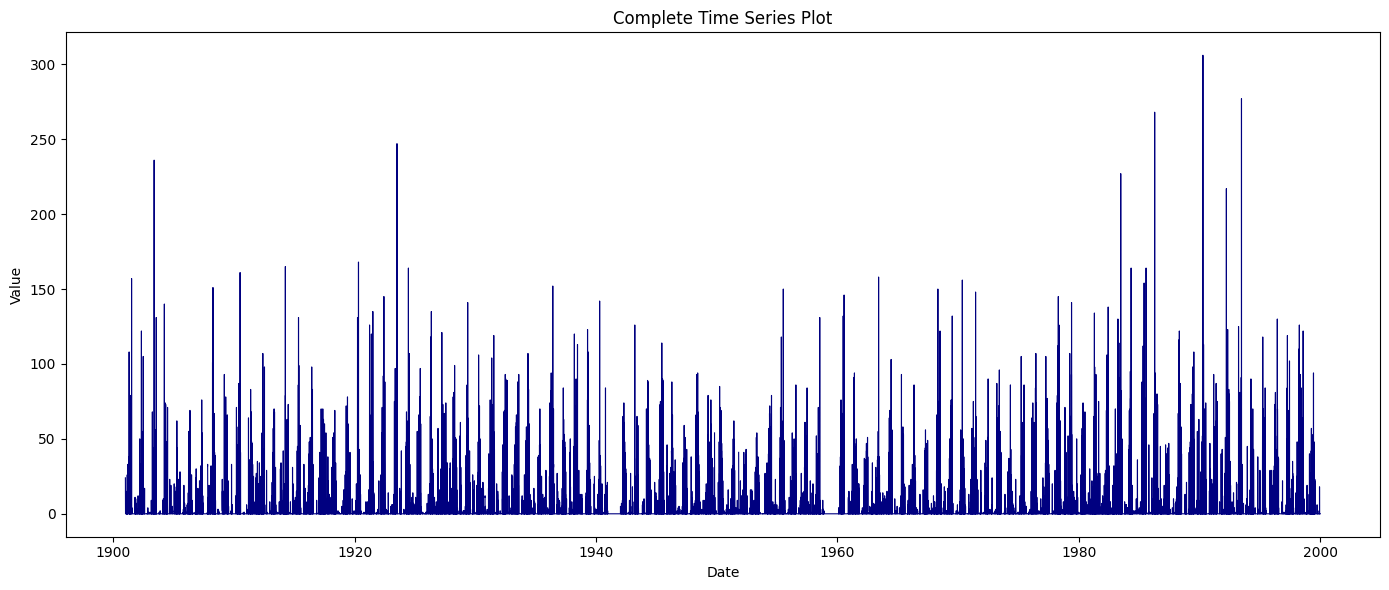


Annual Statistics:
          mean  median  min    max        std
Date                                         
1901  3.741758     0.0  0.0  157.0  14.478418
1902  2.920765     0.0  0.0  122.0  11.872231
1903  3.672131     0.0  0.0  236.0  16.638349
1904  3.021739     0.0  0.0  140.0  11.689422
1905  1.926027     0.0  0.0   62.0   5.822230
...        ...     ...  ...    ...        ...
1996  4.779891     0.0  0.0  130.0  14.197053
1997  4.000000     0.0  0.0  119.0  13.522062
1998  5.724044     0.0  0.0  126.0  16.642834
1999  3.928962     0.0  0.0   94.0  10.304428
2000  0.000000     0.0  0.0    0.0   0.000000

[100 rows x 5 columns]


/tmp/ipykernel_10985/3510374179.py:26: FutureWarning: The provided callable <function mean at 0x7f5dd45a0400> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  heatmap_data = df_long.pivot_table(index='DayOfYear', columns='Year', values='Value', aggfunc=np.mean)


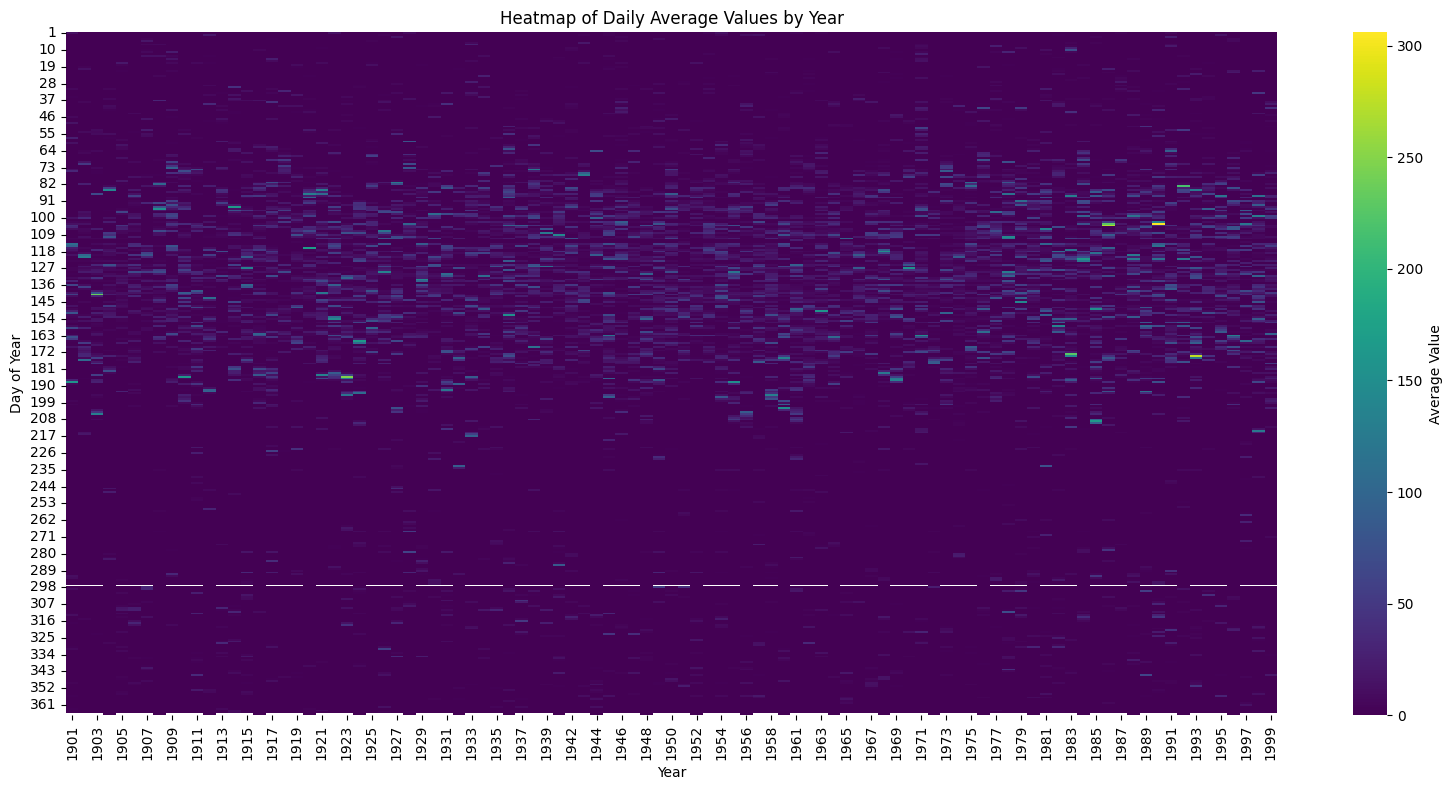

In [14]:
# =============================================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# =============================================================================

# 2a. Descriptive statistics:
print("Overall Descriptive Statistics:")
print(df_long['Value'].describe())

# 2b. Time Series Plot:
plt.figure(figsize=(14,6))
plt.plot(df_long.index, df_long['Value'], color='navy', linewidth=0.8)
plt.title("Complete Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.tight_layout()
plt.show()

# 2c. Annual Statistics: Compute summary statistics per year.
annual_stats = df_long.groupby(df_long.index.year)['Value'].agg(['mean', 'median', 'min', 'max', 'std'])
print("\nAnnual Statistics:")
print(annual_stats)

# 2d. Heatmap of Daily Averages by Year:
# Create a pivot table with Day-of-Year on rows and Year on columns.
df_long['DayOfYear'] = df_long.index.dayofyear
heatmap_data = df_long.pivot_table(index='DayOfYear', columns='Year', values='Value', aggfunc=np.mean)
plt.figure(figsize=(16,8))
sns.heatmap(heatmap_data, cmap="viridis", cbar_kws={'label': 'Average Value'})
plt.title("Heatmap of Daily Average Values by Year")
plt.xlabel("Year")
plt.ylabel("Day of Year")
plt.tight_layout()
plt.show()



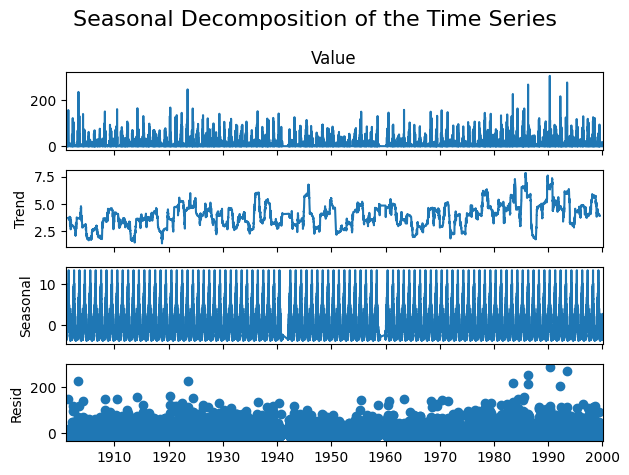

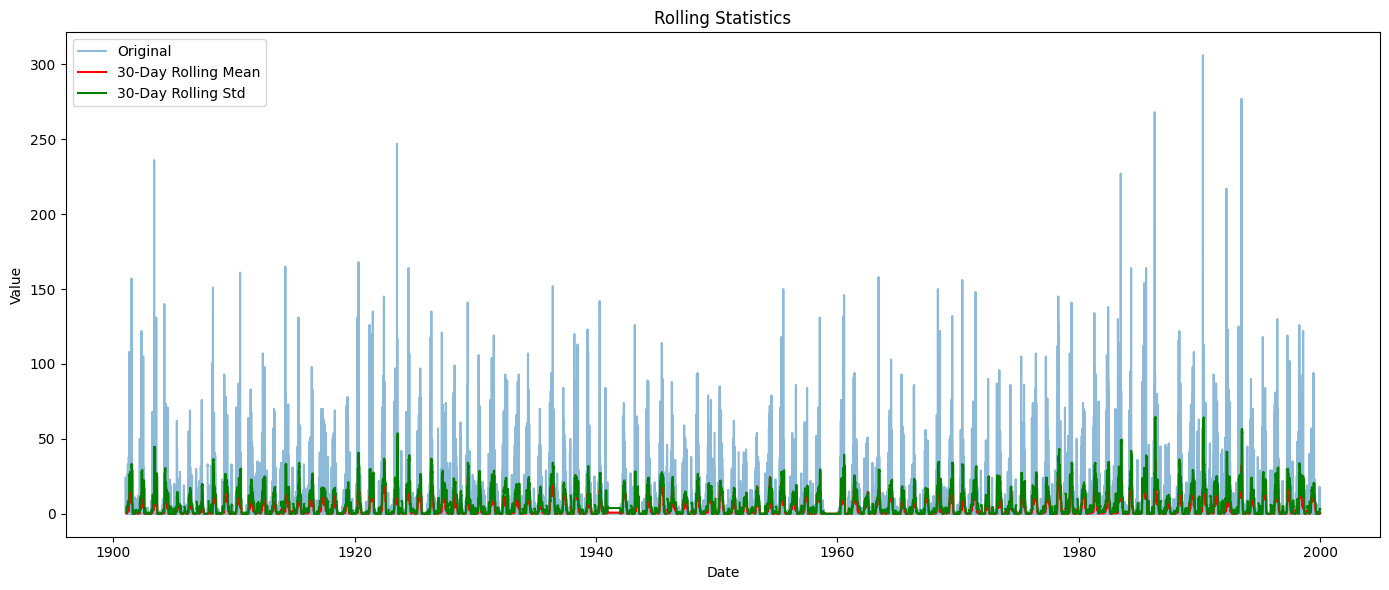

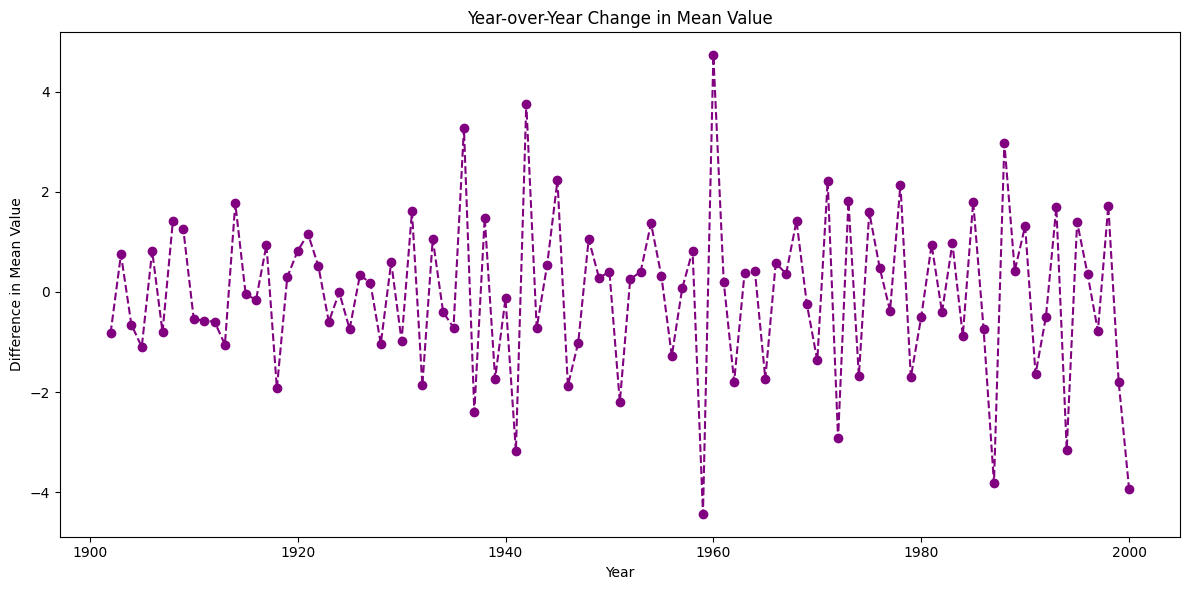

In [15]:
# =============================================================================
# 3. TREND, SEASONALITY & NOISE ANALYSIS
# =============================================================================

# 3a. Seasonal Decomposition
# Use an additive model and assume a seasonal period of 365 (days in a year).
decomp_result = seasonal_decompose(df_long['Value'].dropna(), model='additive', period=365)
decomp_result.plot()
plt.suptitle("Seasonal Decomposition of the Time Series", fontsize=16)
plt.tight_layout()
plt.show()

# 3b. Rolling Statistics: Moving average and standard deviation (window = 30 days)
rolling_window = 30
df_long['Rolling_Mean'] = df_long['Value'].rolling(window=rolling_window).mean()
df_long['Rolling_Std']  = df_long['Value'].rolling(window=rolling_window).std()

plt.figure(figsize=(14,6))
plt.plot(df_long.index, df_long['Value'], label='Original', alpha=0.5)
plt.plot(df_long.index, df_long['Rolling_Mean'], label=f'{rolling_window}-Day Rolling Mean', color='red')
plt.plot(df_long.index, df_long['Rolling_Std'], label=f'{rolling_window}-Day Rolling Std', color='green')
plt.title("Rolling Statistics")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

# 3c. Year-over-Year Trend: Compute differences in annual means
annual_mean = df_long.groupby(df_long.index.year)['Value'].mean()
annual_diff = annual_mean.diff()

plt.figure(figsize=(12,6))
plt.plot(annual_diff.index, annual_diff, marker='o', linestyle='--', color='purple')
plt.title("Year-over-Year Change in Mean Value")
plt.xlabel("Year")
plt.ylabel("Difference in Mean Value")
plt.tight_layout()
plt.show()


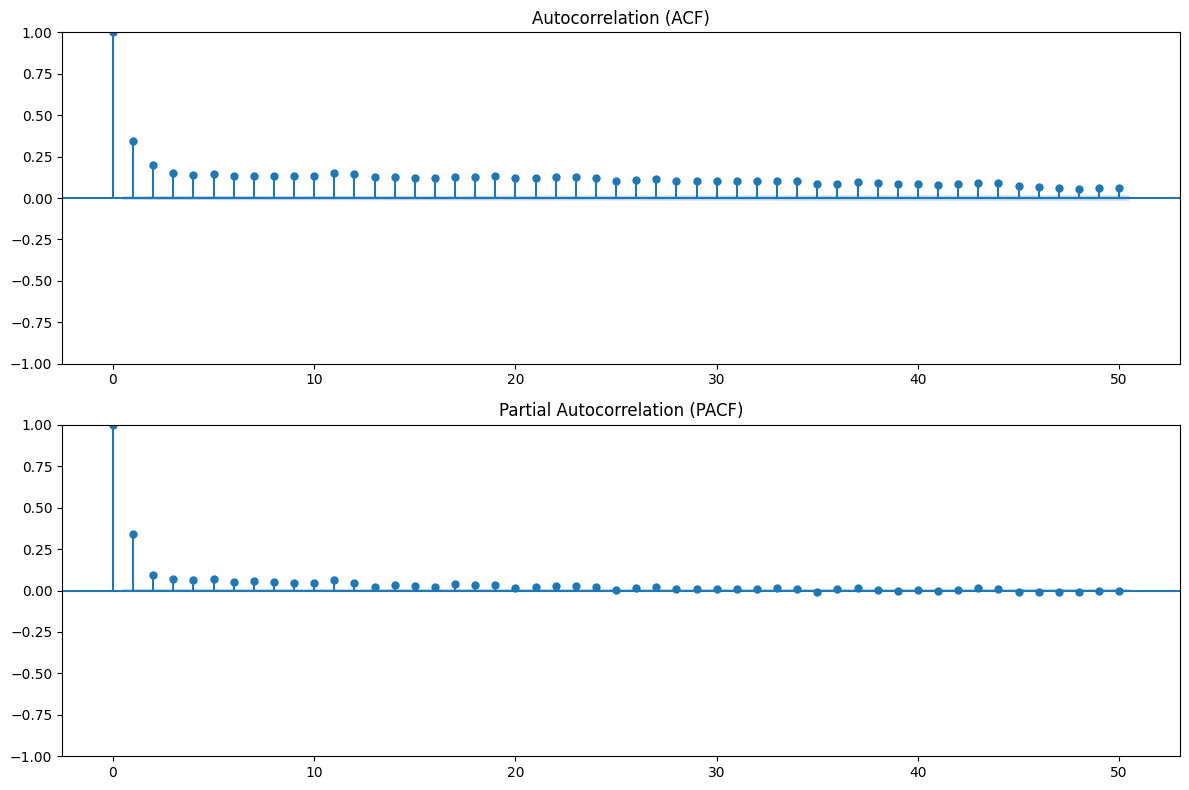

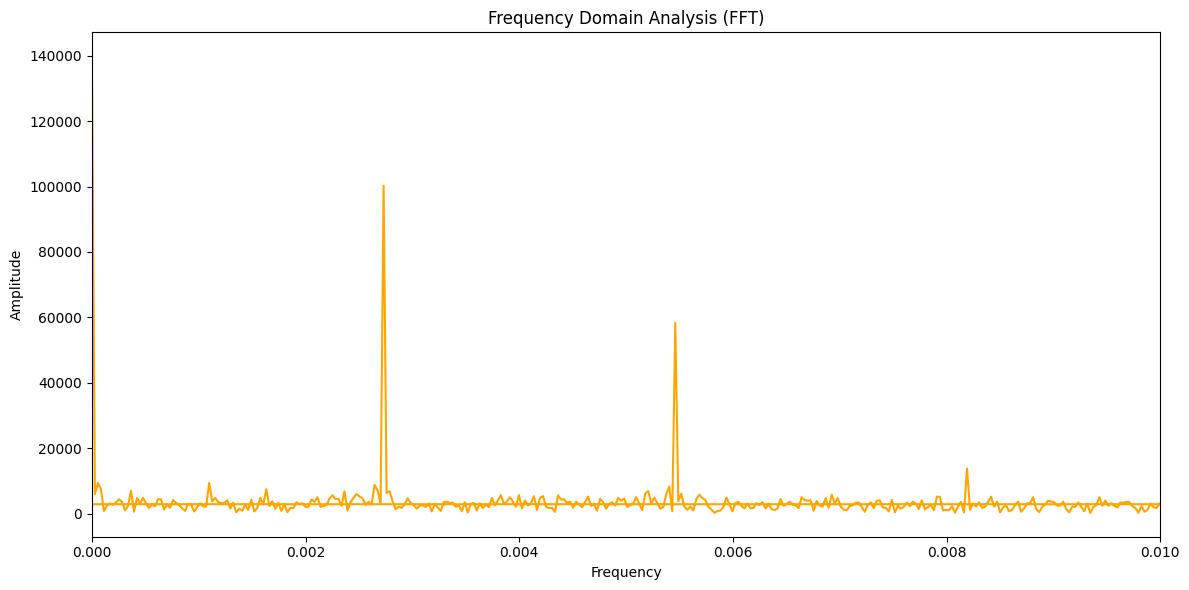

In [16]:

# =============================================================================
# 4. AUTOCORRELATION & FREQUENCY ANALYSIS
# =============================================================================

# 4a. Autocorrelation (ACF) and Partial ACF (PACF) plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,8))
plot_acf(df_long['Value'].dropna(), ax=ax1, lags=50)
ax1.set_title("Autocorrelation (ACF)")
plot_pacf(df_long['Value'].dropna(), ax=ax2, lags=50)
ax2.set_title("Partial Autocorrelation (PACF)")
plt.tight_layout()
plt.show()

# 4b. Frequency Domain Analysis: FFT to identify dominant cycles
fft_vals = np.fft.fft(df_long['Value'].dropna())
fft_freq = np.fft.fftfreq(len(fft_vals))

plt.figure(figsize=(12,6))
plt.plot(fft_freq, np.abs(fft_vals), color='orange')
plt.title("Frequency Domain Analysis (FFT)")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.xlim(0, 0.01)  # Focus on the lower frequency components
plt.tight_layout()
plt.show()
